In [63]:
import xarray as xr
import matplotlib.pylab as plt
import numpy as np
from scipy.interpolate import CloughTocher2DInterpolator, LinearNDInterpolator, NearestNDInterpolator
import scipy.spatial.qhull as qhull
import matplotlib.tri as mtri
%matplotlib inline
xr.set_options(display_style="text") # make it look better when posted online. Comment to get nicer representation of xarrays
import matplotlib.cm as cm

In [66]:
data = xr.open_dataset('/work/ka1081/NextGEMS/ECMWF-AWI/IFS-FESOM2-4km/Cycle1/atm/12hr/ts/r1i1p1f1/2d/gn/ts_12hr_IFS-FESOM2-4km_Cycle1_r1i1p1f1_2d_gn_20200228120000-20200229000000.nc')

In [67]:
grid = xr.open_dataset('/work/ka1081/NextGEMS/ECMWF-AWI/IFS-FESOM2-4km/Cycle1/atm/fx/gn/grid.nc')

In [68]:
grid

<xarray.Dataset>
Dimensions:    (nv: 4, rgrid: 26306560)
Coordinates:
    clon       (rgrid) float64 ...
    clat       (rgrid) float64 ...
Dimensions without coordinates: nv, rgrid
Data variables:
    lml        (rgrid) float32 ...
    clon_bnds  (rgrid, nv) float64 ...
    clat_bnds  (rgrid, nv) float64 ...

In [71]:
model_lon = grid.clon.values*180./np.pi
model_lat = grid.clat.values*180./np.pi
data_sample = a.ts[0,:].values

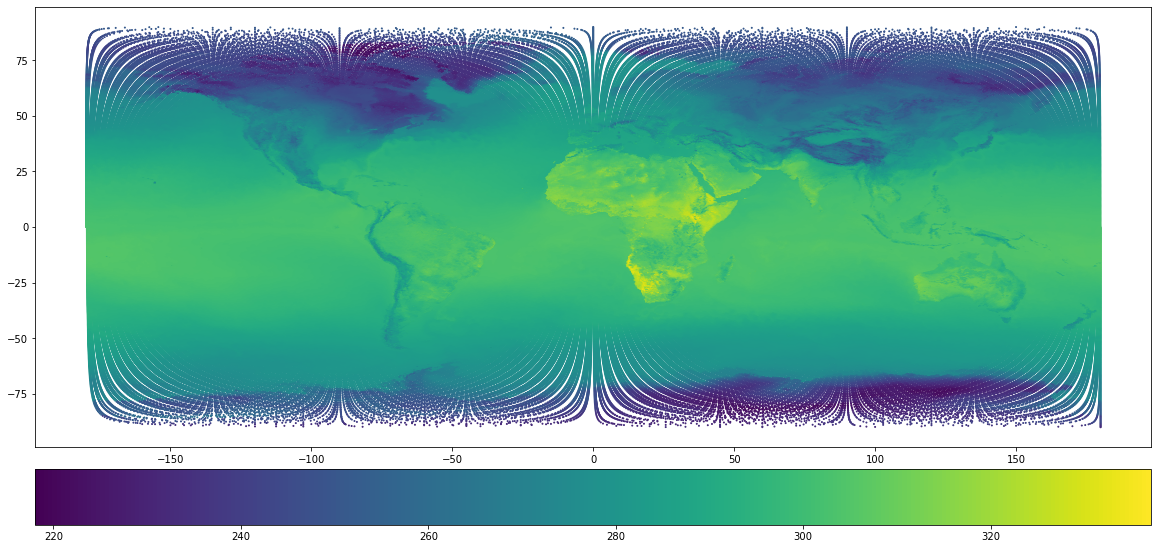

In [72]:
sstep = 30
plt.figure(figsize=(20,10))
plt.scatter(model_lon[::sstep], model_lat[::sstep], s=1 , c=data_sample[::sstep])
plt.colorbar(orientation='horizontal', pad=0.04)

In [73]:
left = -90
right = -10
bottom = 0
top = 26

In [25]:
region = (model_lon < right) & (model_lon>left) & (model_lat > bottom) & (model_lat < top)

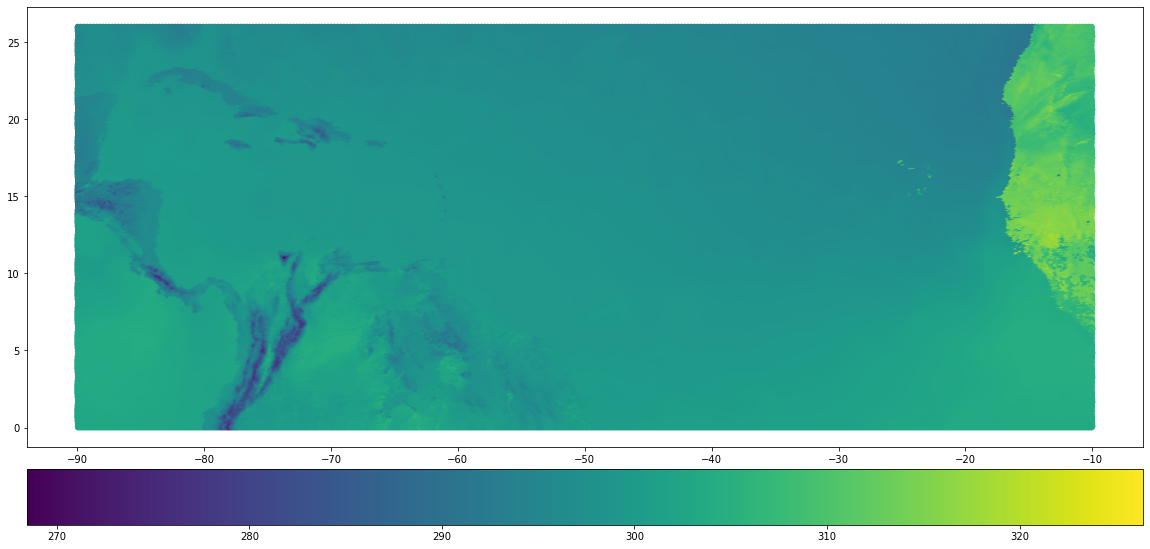

In [74]:
sstep = 5
plt.figure(figsize=(20,10))
plt.scatter(model_lon[region][::sstep], model_lat[region][::sstep], s=30 , c=data_sample[region][::sstep])
plt.colorbar(orientation='horizontal', pad=0.04)

In [75]:
lon = np.linspace(-180, 180, 360*4)
lat = np.linspace(-80, 90, 180*4)
lon2, lat2 = np.meshgrid(lon, lat)

In [76]:
points = np.vstack((model_lon, model_lat)).T
# points, points_icon

In [77]:
%%time
nn_interpolation = NearestNDInterpolator(points, data_sample)

CPU times: user 15.3 s, sys: 670 ms, total: 16 s
Wall time: 16 s


In [78]:
%%time
interpolated_nn_fesom = nn_interpolation((lon2, lat2))

CPU times: user 1.73 s, sys: 7 ms, total: 1.74 s
Wall time: 1.73 s


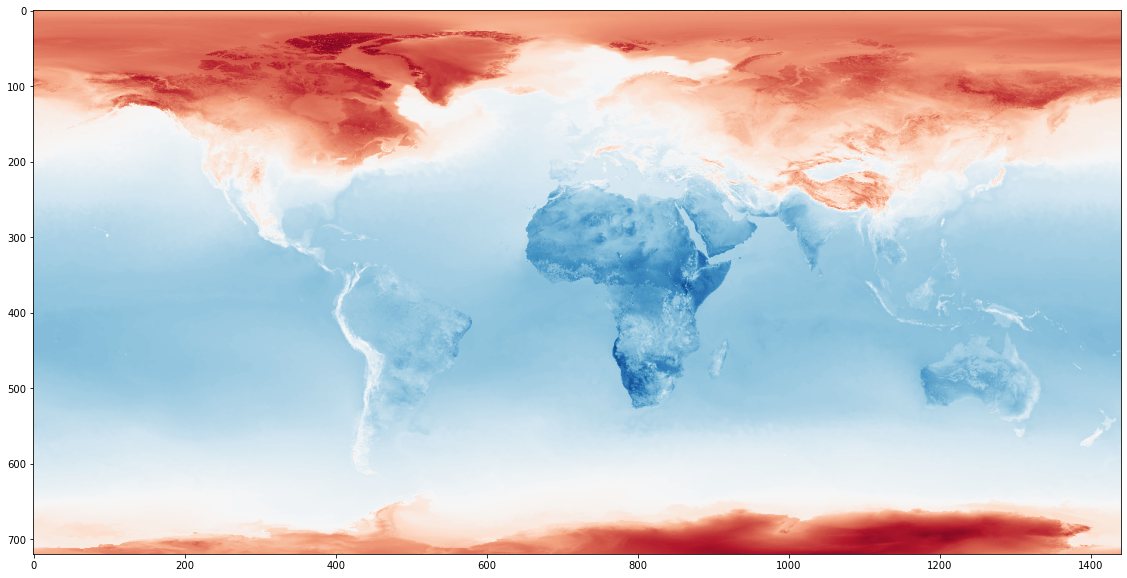

In [79]:
plt.figure(figsize=(20,10))
plt.imshow(np.flipud(interpolated_nn_fesom), cmap=cm.RdBu)